In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

2
 (-5 - 6 cs  + 3 w)/(2 + 6 w)
x                             (BesselJ[
 
                        4     2                         2
         Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>        -------------------------------------------------, cs x] C[1] + 
                              2 + 6 w
 
                             4     2                         2
              Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>     BesselY[-------------------------------------------------, cs x] C[2])
                                   2 + 6 w
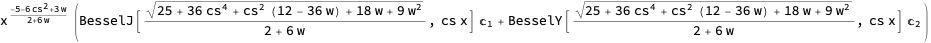

In [11]:
Phisol[x_] = Simplify[Phi[x]/(2+6w)^(-(5+6cs^2-3w)/(2+6w)) /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/x Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/x^2)Phi[x] == 0, Phi[x], x][[1]], 
                    {w>=0,cs>=0}]

In [62]:
Expand[(5+6cs^2-3w)^2-48(cs^2-w)]

2        4               2        2
25 + 12 cs  + 36 cs  + 18 w - 36 cs  w + 9 w

nu
       x
-----------------
 nu
2   Gamma[1 + nu]
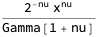

In [64]:
Normal[Series[BesselJ[nu,x],{x,0,1}]]

2
-5 - 6 cs  + 3 w
----------------
    2 + 6 w
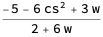

In [39]:
nu = Sqrt[25+12cs^2+36cs^4+18w-36cs^2 w+9w^2]/(2+6w);
Simplify[-Sqrt[nu^2+12(cs^2-w)/(1+3w)^2], {w>=0,5+6cs^2-3w>=0}]
Clear[nu]

3 (-1 + w)                    3 (-1 + w)
Sqrt[x] (BesselJ[----------, x] C[1] + BesselY[----------, x] C[2])
                  2 + 6 w                       2 + 6 w
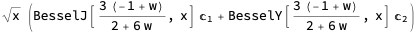

In [35]:
Gsol[x_] = Simplify[G[x] /. DSolve[G''[x]+(1-2(1-3w)/(1+3w)^2/x^2)G[x] == 0, G[x], x][[1]], {w<1, x>0}]

In [47]:
3(-1+w)/(2+6w) /. {w->1/3}

1
-(-)
  2

In [42]:
G1[x_] = Sqrt[x] BesselJ[nu,x];
G2[x_] = Sqrt[x] BesselY[nu,x];

(Sqrt[eta etap] Pi (BesselJ[nu, etap k] BesselY[nu, eta k] - 
 
>       BesselJ[nu, eta k] BesselY[nu, etap k])) / 2
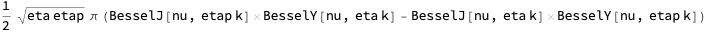

In [58]:
GreenGMode[k_,eta_,etap_] = FullSimplify[(G1[k eta]G2[k etap] - G2[k eta]G1[k etap]) / (D[G1[k etap],etap]G2[k etap] - G1[k etap]D[G2[k etap],etap]), {eta>0, etap>0, k>0}]

n
      x
---------------
 n
2  Gamma[1 + n]
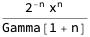

In [14]:
Normal[Series[BesselJ[n,x],{x,0,1}]]

n                         n
  x  Cos[n Pi] Gamma[-n]    2  Gamma[n]
-(----------------------) - -----------
           n                       n
          2  Pi                Pi x
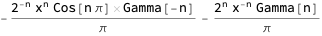

In [15]:
Normal[Series[BesselY[n,x],{x,0,1}]]

In [ ]:
If1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)+1), {y,1,10^5}, MinRecursion->9]
If2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)+1)^2 y, {y,1,10^5}, MinRecursion->9]
Ib1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)-1), {y,1,10^5}, MinRecursion->9]
Ib2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)-1)^2 y, {y,1,10^5}, MinRecursion->9]

In [ ]:
DeltafList = Table[{10^logx, 10^(4logx)(10^logx If2[10^logx]-4If1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming
DeltabList = Table[{10^logx, 10^(4logx)(10^logx Ib2[10^logx]-4Ib1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming

Out[49]:
 
 
 
 
 Out[50]:


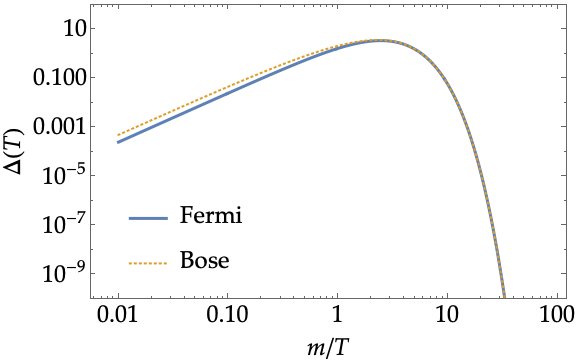

In [ ]:
FigTraceAnomaly = ListLogLogPlot[{DeltafList,DeltabList}, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotRange->{10^-10,10^2}, 
                                   FrameLabel->{Row[{m, "/", T}], \[CapitalDelta][T]}, PlotLegends->Placed[{"Fermi","Bose"}, {0.2,0.2}]]

In [ ]:
Export["TraceAnomaly.pdf",FigTraceAnomaly];

5 + 3 w                                5 + 3 w
BesselJ[-----------, Sqrt[w] x] C[1]   BesselY[-----------, Sqrt[w] x] C[2]
        2 (1 + 3 w)                            2 (1 + 3 w)
------------------------------------ + ------------------------------------
               (5 + 3 w)/(2 + 6 w)                    (5 + 3 w)/(2 + 6 w)
  (2 x + 6 w x)                          (2 x + 6 w x)
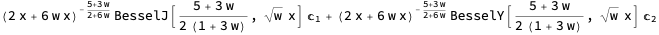

In [18]:
Phi[x] /. DSolve[{Phi''[x]+6(1+w)/(1+3w)/x Phi'[x]+w Phi[x] == 0}, Phi[x], x][[1]] 